In [43]:
import os
import pandas as pd
from tflearn.datasets import imdb
import seaborn as sns
import matplotlib as mpl
import pickle as pkl
import torch

In [2]:
from cell import utils, plot_utils

In [3]:
model_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/DMGI/saved_model"
data_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/cell/DMGI/data/"

### JSD directed graph

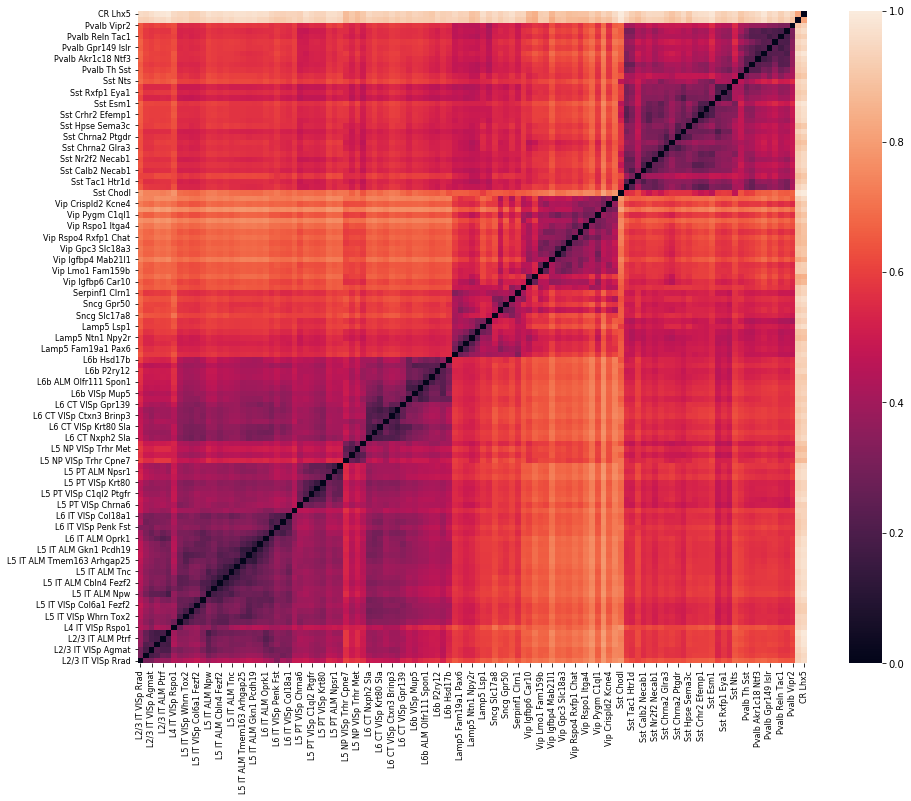

In [4]:
jsd = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/jsd_python_recomputed.csv", index_col="Unnamed: 0")
fig = plt.figure(figsize=(15,12))
ax = sns.heatmap(jsd)
ax.tick_params(labelsize=8)
ax.invert_yaxis()

### Node features

In [182]:
FACS_cl_med = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/FACs_cl_med.csv", index_col="Unnamed: 0")
FACS_cl_med = FACS_cl_med.T
FACS_cl_med.head()

,Scrg1,Nxph1,Krt73,Tmem45a,Piezo2,Pax6,Frmd7,Luzp2,Frem1,Sln,...,Gal3st4,Soga1,Ppcdc,Gtf2h2,Gfm2,Dennd4a,Skil,Tjp1,Nckap1,R3hdm1
CR Lhx5,0.931616,0.405119,0.225042,0.127266,0.000000,0.225042,0.708250,5.121447,0.203581,0.000000,...,0.400079,0.975211,2.617304,2.628105,1.888501,2.649400,1.228859,0.598330,6.778050,5.842462
L2/3 IT ALM Macc1 Lrg1,0.047271,0.207659,0.000000,0.023900,0.253296,0.730654,0.000000,7.169090,0.101722,0.160980,...,2.090867,0.264077,4.020365,7.670222,6.431995,6.187163,7.376658,5.931085,11.011198,10.851851
L2/3 IT ALM Ptrf,0.018221,0.191806,0.070293,0.000000,0.062007,0.496136,0.022434,7.220701,0.421405,0.062590,...,1.813255,0.349633,3.380502,7.483982,6.637936,6.365954,7.296120,6.001814,11.365824,10.496390
L2/3 IT ALM Sla,0.047539,0.417673,0.045187,0.000000,0.121959,0.599338,0.021288,7.612015,0.109497,0.369499,...,1.533619,1.956429,4.009528,7.628352,6.674003,6.873885,7.666093,6.052161,11.186833,10.566826
L2/3 IT VISp Adamts2,0.010982,0.111455,0.103881,0.000000,0.000000,1.801420,0.000000,0.525589,0.036676,0.000000,...,1.576573,1.408480,3.197426,6.426799,5.861858,5.799530,7.436551,5.986367,10.824725,10.951032


In [183]:
ll = [i.split("-") for i in utils.get_npp_visp_layers()]
npp_genes = np.unique([item for sublist in ll for item in sublist])
npp_genes = [i for i in npp_genes if i in FACS_cl_med.columns]

In [184]:
FACS_cl_med = FACS_cl_med[npp_genes]

In [185]:
FACS_cl_med.shape

(117, 44)

In [186]:
jsd.shape

(117, 117)

Lets make sure they have the same labels

In [187]:
[i for i in FACS_cl_med.index.tolist() if i not in jsd.index.tolist()]

[]

In [188]:
select_cl = FACS_cl_med.index

In [189]:
jsd = jsd.reindex(FACS_cl_med.index)

In [190]:
jsd = jsd[select_cl]
jsd.head()

,CR Lhx5,L2/3 IT ALM Macc1 Lrg1,L2/3 IT ALM Ptrf,L2/3 IT ALM Sla,L2/3 IT VISp Adamts2,L2/3 IT VISp Agmat,L2/3 IT VISp Rrad,L4 IT VISp Rspo1,L5 IT ALM Cbln4 Fezf2,L5 IT ALM Cpa6 Gpr88,...,Vip Igfbp4 Mab21l1,Vip Igfbp6 Car10,Vip Igfbp6 Pltp,Vip Lect1 Oxtr,Vip Lmo1 Fam159b,Vip Lmo1 Myl1,Vip Ptprt Pkp2,Vip Pygm C1ql1,Vip Rspo1 Itga4,Vip Rspo4 Rxfp1 Chat
CR Lhx5,0.000000,0.994837,0.986370,0.983243,0.950134,0.964855,0.960910,0.955185,0.957255,0.969032,...,0.860279,0.869183,0.845282,0.894256,0.920733,0.928208,0.879929,0.896126,0.894368,0.889405
L2/3 IT ALM Macc1 Lrg1,0.994837,0.000000,0.184492,0.175146,0.258561,0.200723,0.374299,0.395470,0.278471,0.313066,...,0.754944,0.671686,0.716743,0.703529,0.679543,0.678277,0.691484,0.694673,0.742182,0.719702
L2/3 IT ALM Ptrf,0.986370,0.184492,0.000000,0.184497,0.270566,0.199509,0.380890,0.416107,0.321687,0.331503,...,0.740285,0.655666,0.698911,0.692209,0.671975,0.668220,0.681041,0.685324,0.732249,0.710728
L2/3 IT ALM Sla,0.983243,0.175146,0.184497,0.000000,0.214161,0.226926,0.368229,0.434578,0.335988,0.347523,...,0.749700,0.666163,0.708695,0.704970,0.678518,0.680090,0.689047,0.693299,0.741993,0.717168
L2/3 IT VISp Adamts2,0.950134,0.258561,0.270566,0.214161,0.000000,0.188236,0.301102,0.400160,0.360651,0.397808,...,0.717738,0.635279,0.675941,0.680206,0.655926,0.661542,0.659374,0.663692,0.711239,0.685294


In [191]:
new_df = np.zeros((117,117))
row, col = np.where((1-jsd)>0.75)
for r, c in zip(row, col):
    new_df[r][c] = 1 

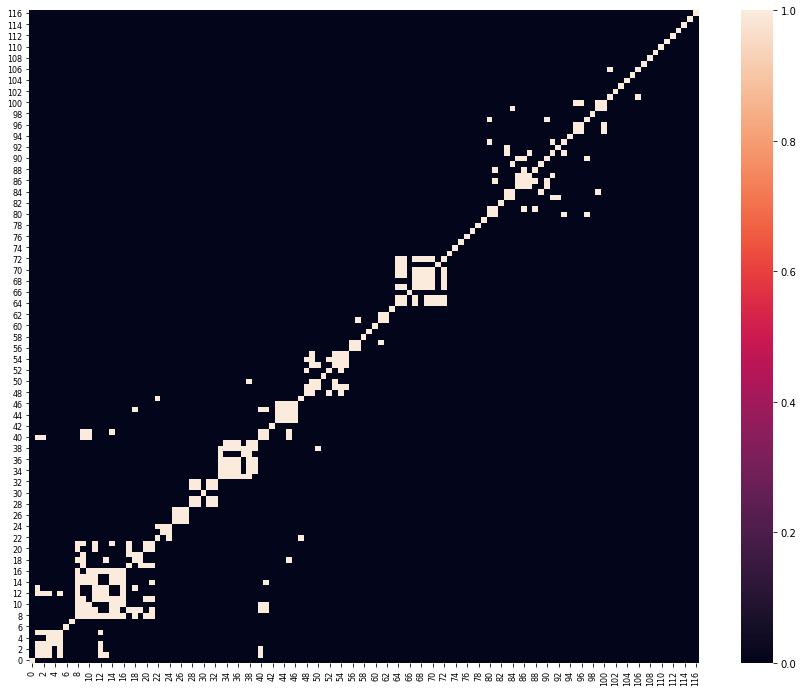

In [192]:
fig = plt.figure(figsize=(15,12))
ax = sns.heatmap(new_df)
ax.tick_params(labelsize=8)
ax.invert_yaxis()

### Save the data in pickel format

In [208]:
data = {}
data['jsd'] = np.array(new_df)
data['feature'] = np.array(FACS_cl_med)
data['train_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['test_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['val_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['label'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))

In [209]:
label = []
for i in range(len(select_cl)):
    for j in range(len(select_cl)):
        if i == j:
            label.append(1)
        else:
            label.append(0)
data['label'] = np.array(label).reshape(len(select_cl),len(select_cl))

In [210]:
# data

In [211]:
import pickle
with open('/Users/fahimehb/Documents/NPP_GNN_project/dat/jsd.pkl', 'wb') as handle:
    pickle.dump(data, handle)

In [200]:
cldf = pd.read_csv("/Users/fahimehb/Documents/GNN/dat/cl_df_150cl.csv", index_col="Unnamed: 0")
cldf = cldf[cldf["cluster_label"].isin(select_cl)]
cldf = cldf.set_index("cluster_label")
cldf = cldf.reindex(select_cl)

## Eye attribute

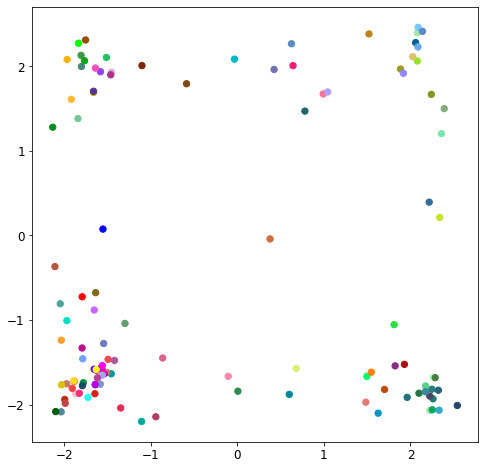

In [113]:
model_output = torch.load(os.path.join(model_dir, "best_jsd_DMGI_jsd.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=30, theta2=30)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, plot_size=(8,8))

### With npp genes Attribute

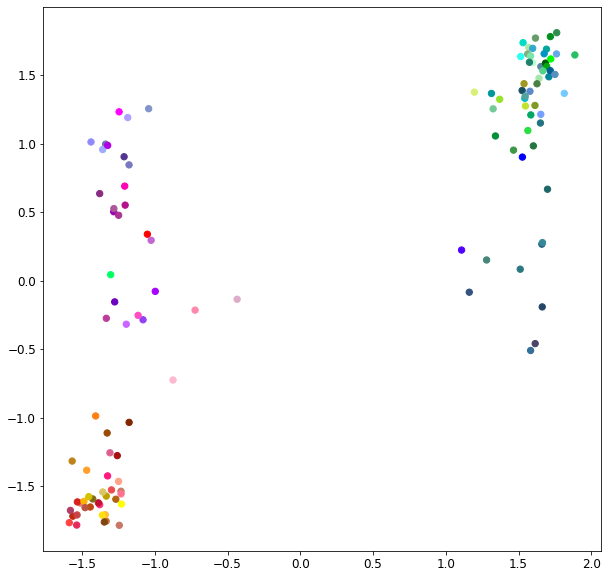

In [223]:
model_output = torch.load(os.path.join(model_dir, "best_jsd_DMGI_jsd.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=30, theta2=30)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2)

### With adj matrix attribute

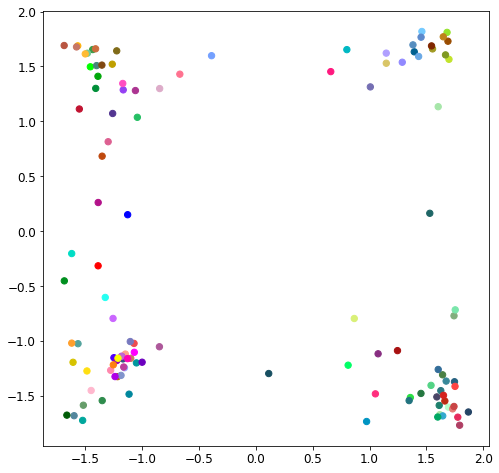

In [207]:
model_output = torch.load(os.path.join(model_dir, "best_jsd_DMGI_jsd.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z0", "Z1", "Z2"])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=30, theta2=30)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, plot_size=(8,8))

### For symmetric version of NPP network


In [129]:
all_layers = utils.get_npp_visp_layers()
all_int_mat = np.zeros((93,93))

for l in all_layers:
    intraction_matrix_filename = utils.get_intraction_matrix_filename(roi= "VISp",
                                                                      layer= l,
                                                                      project_name= "NPP_GNN_project")

    all_int_mat = all_int_mat + np.array(pd.read_csv(intraction_matrix_filename , index_col="Unnamed: 0"))
    
all_int_mat = pd.DataFrame(all_int_mat)
new_all_int_mat = np.zeros((93,93))
for r,c in all_int_mat.iterrows():
    sorted_vals = np.argsort(-all_int_mat[r])[0:5] 
    #random_index = np.random.randint(0, 93, size=5)
    for m in sorted_vals:
        new_all_int_mat[int(r)][m] = all_int_mat[r][m]
        

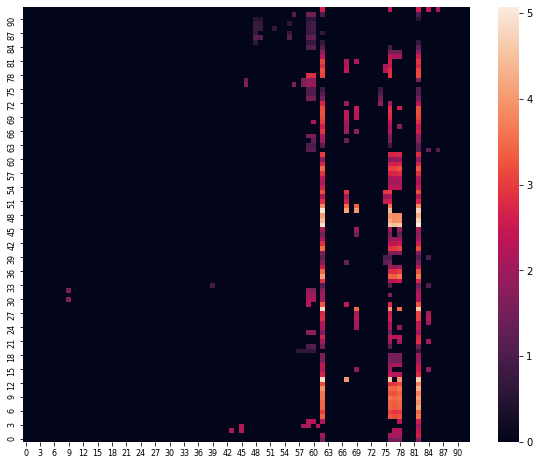

In [130]:
df =edge_list.pivot(index="source", columns="target", values="weight")
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(new_all_int_mat)
ax.tick_params(labelsize=8)
ax.invert_yaxis()

In [131]:
cldf = pd.read_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv")

In [132]:
select_cl = cldf['cluster_label'].tolist()

In [133]:
# select_cl

In [134]:
FACS_cl_med = FACS_cl_med.reindex(select_cl)
#FACS_cl_med = FACS_cl_med[npp_genes]

In [135]:
FACS_cl_med.shape

(93, 44)

In [157]:
data = {}
data['npp'] = np.array(new_all_int_mat)
data['feature'] = np.array(new_all_int_mat)
data['train_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['test_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
data['val_idx'] = np.array([i for i in range(len(select_cl))]).reshape(1,len(select_cl))
#data['label'] = np.array([i for i in range(len(select_cl))])

label = []
for i in range(len(select_cl)):
    for j in range(len(select_cl)):
        if i == j:
            label.append(1)
        else:
            label.append(0)
data['label'] = np.array(label).reshape(len(select_cl),len(select_cl))

import pickle
with open('/Users/fahimehb/Documents/NPP_GNN_project/dat/npp_sparse_more_realistic_adj_features_adj_dmgi.pkl', 'wb') as handle:
    pickle.dump(data, handle)

### Eye attribute

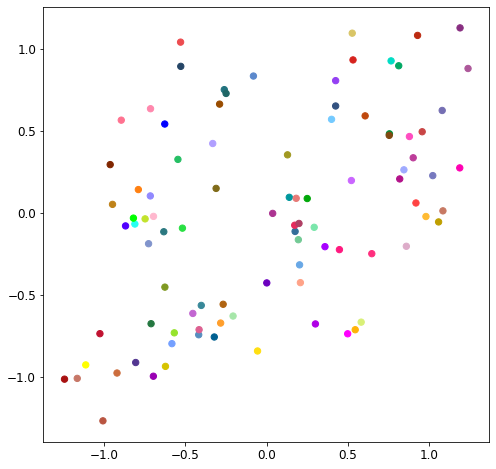

In [147]:
model_output = torch.load(os.path.join(model_dir, "best_npp_sparse_more_realistic_adj_features_adj_dmgi_DMGI_npp.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z" + str(i) for i in range(3)])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))

### With npp genes as attributes

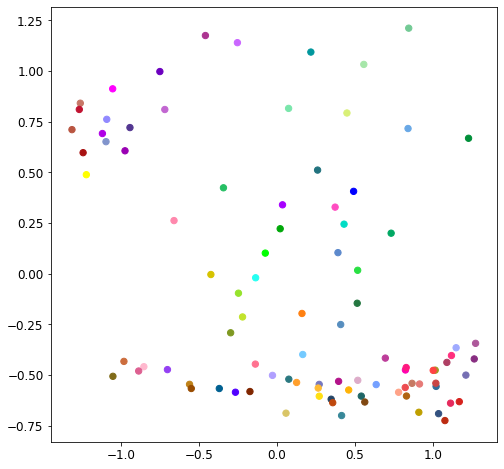

In [156]:
model_output = torch.load(os.path.join(model_dir, "best_npp_sparse_more_realistic_adj_features_adj_dmgi_DMGI_npp.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z" + str(i) for i in range(3)])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))

### With adj matrix as attributes

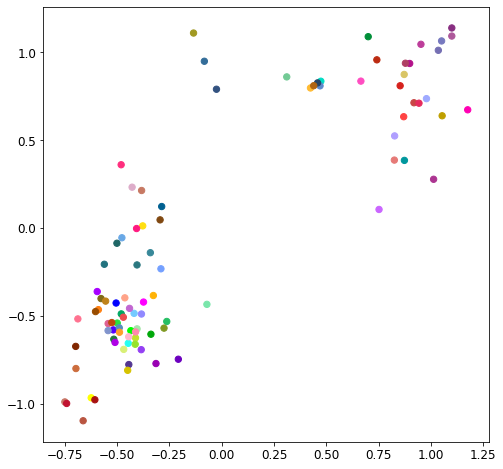

In [171]:
model_output = torch.load(os.path.join(model_dir, "best_npp_sparse_more_realistic_adj_features_adj_dmgi_DMGI_npp.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
emb_2d = pd.DataFrame(emb_2d, columns=["Z" + str(i) for i in range(3)])
emb_2d['cluster_color'] = cldf['cluster_color'].tolist()
emb_2d.index = cldf['cluster_label'].tolist()

#fig = plot_utils.plot_embedding(emb_2d, plot_dim=3, theta1=10, theta2=30, annotation=False)
fig = plot_utils.plot_embedding(emb_2d, plot_dim=2, annotation=False, plot_size=(8,8))

In [177]:
sum(sum(data['npp'] == data['feature']))

8649

In [178]:
cldf.index = cldf.index.astype('str')

In [179]:
from cell import analysis
analysis.get_closest_node_label(model_output['H'].detach().numpy()[0], [str(i) for i in range(93)], "62", 5, cldf )

closest nodes to : Sst Chodl
------------------------------------------

            cluster_label
82                Sst Nts
78               Sst Esm1
77  Sst Crh 4930553C11Rik
76       Sst Crhr2 Efemp1
69          Sst Myh8 Etv1


['Sst Nts',
 'Sst Esm1',
 'Sst Crh 4930553C11Rik',
 'Sst Crhr2 Efemp1',
 'Sst Myh8 Etv1']

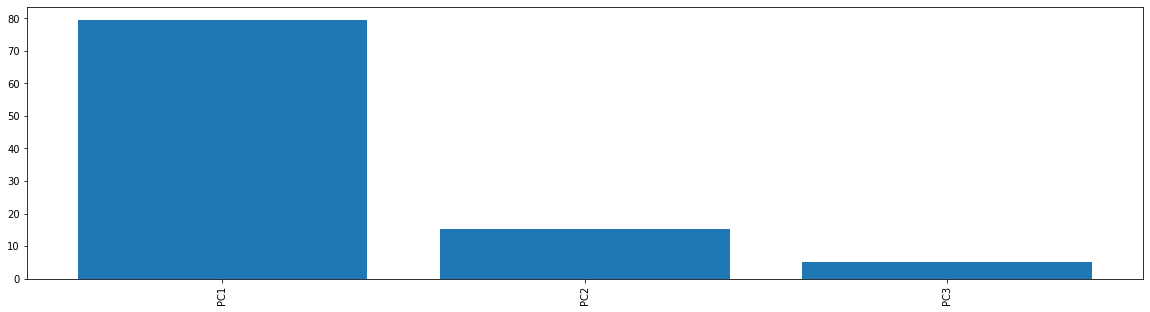

In [181]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

vectors = model_output['H'].detach().numpy()[0]

pca = PCA(n_components=3)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

This method is highly depenedent on the features and not that much on the neighborhood